# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
Train_data_file = "twitter-training-data.txt"
Train_data_file = "twitter-dev-data.txt"
test_file1 = "twitter-test1.txt"
test_file2 = "twitter-test2.txt"
test_file3 = "twitter-test3.txt"

cols = ["tweet_id", "sentiment", "tweet_text"]

In [3]:
test_file2

'twitter-test2.txt'

## Defining a function for Visualizations

In [4]:

def plot_sentiment_distribution(data_file):
    # read the data into a Pandas DataFrame
    data = pd.read_csv(data_file, sep='\t', header=None, names=cols)

    # generate a frequency plot of the sentiment labels
    data['sentiment'].value_counts().plot(kind='bar', figsize=(10,2))
    plt.xlabel("Sentiment Label")
    plt.ylabel("Frequency")
    plt.title(data_file)
    plt.show()


## Defining a function for preprocessing

In [5]:
def preprocess_text(text):
    # Remove URLs, mentions, hashtags, punctuations, and special characters
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove special characters
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]
    # Stem or lemmatize words
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into text
    text = ' '.join(tokens)
    return text

## Visualizing and Reading the Data

In [6]:
train_data = pd.read_csv(Train_data_file, sep='\t', header=None, names=cols)
train_data.head()

,tweet_id,sentiment,tweet_text
0,262696992176304465,neutral,@Oirisheye Hey you! I'm gonna be in Dublin in ...
1,410734138242126311,positive,Literally so excited I'm going to a Sam Smith ...
2,237615985571058688,neutral,@WINDmobile Will there be an option to buy the...
3,90473590077188360,neutral,Our Little Ms. Philippines. 👏👏👏#littleMsPhilip...
4,450236582392850660,negative,"@AngryRaiderFan I know. This, TPP, expanded wa..."


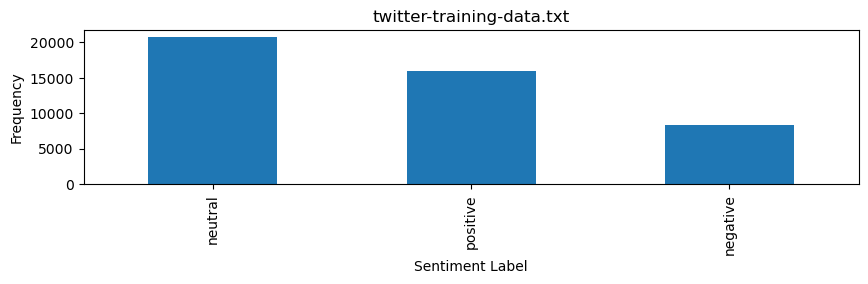

In [7]:
plot_sentiment_distribution("twitter-training-data.txt")

In [8]:
dev_data = pd.read_csv("twitter-dev-data.txt", sep='\t', header=None, names=cols)
dev_data.head()

,tweet_id,sentiment,tweet_text
0,262696992176304465,neutral,@Oirisheye Hey you! I'm gonna be in Dublin in ...
1,410734138242126311,positive,Literally so excited I'm going to a Sam Smith ...
2,237615985571058688,neutral,@WINDmobile Will there be an option to buy the...
3,90473590077188360,neutral,Our Little Ms. Philippines. 👏👏👏#littleMsPhilip...
4,450236582392850660,negative,"@AngryRaiderFan I know. This, TPP, expanded wa..."


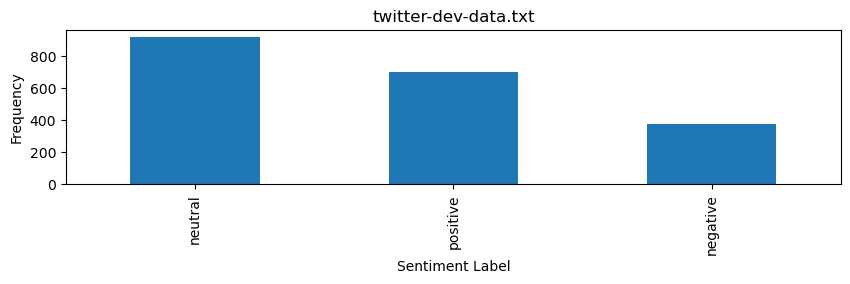

In [9]:
plot_sentiment_distribution("twitter-dev-data.txt")

In [10]:
test_data1 = pd.read_csv(test_file1, sep='\t', header=None, names=cols)
test_data1.head()

,tweet_id,sentiment,tweet_text
0,163361196206957578,neutral,Candids: Heading to the Chateau Marmont in Wes...
1,768006053969268950,negative,@Dont__KAY_me omg same I was reading it in sch...
2,742616104384772304,neutral,Watching MTV Hits! The Wanted Chasing the sun!
3,102313285628711403,neutral,"Bing one-ups knowledge graph, hires Encyclopae..."
4,653274888624828198,neutral,"On Thursday, concealed-carry gun license holde..."


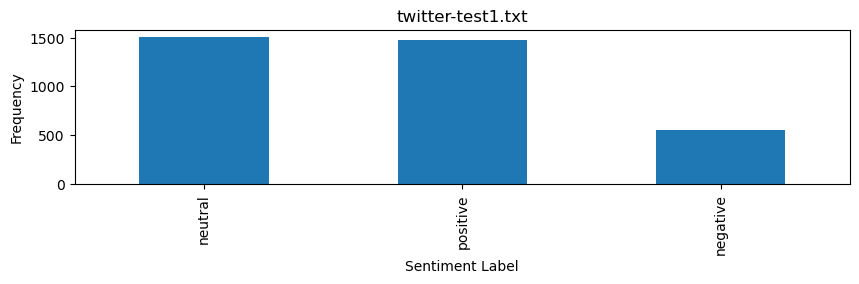

In [11]:
plot_sentiment_distribution("twitter-test1.txt")

In [12]:
test_data2 = pd.read_csv(test_file2, sep='\t', header=None, names=cols)
test_data2.head()

,tweet_id,sentiment,tweet_text
0,364323072843019872,neutral,Anybody going to that 4th of July pool party i...
1,802725906723804599,positive,The band enjoyed a day of sightseeing in Berli...
2,250002604645092879,positive,@wintersleep saw you play at Bluesfest last su...
3,510023256502999912,neutral,The Kee to Bala just got Drizzy: Intimate conc...
4,196017824322271173,neutral,Going to see Richard Dawkins &amp; Mehdi Hasan...


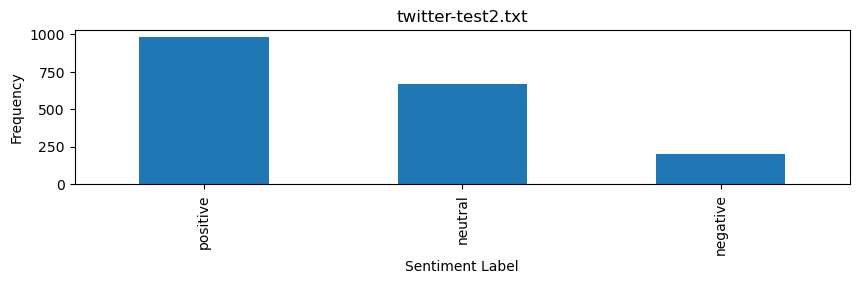

In [13]:
plot_sentiment_distribution("twitter-test2.txt")

In [14]:
test_data3 = pd.read_csv(test_file3, sep='\t', header=None, names=cols)
test_data3.head()

,tweet_id,sentiment,tweet_text
0,63115054245201986,neutral,@MoodieNathan Yeah dont think 8 or 9 like some...
1,192028253675695783,negative,Very Unfair: West Indies players to fly back o...
2,288283057533261865,positive,@TerryFoster971 @MikeValenti971 Ben Affleck is...
3,250327270502030803,neutral,Subscribe to Nash's channel to see when his ne...
4,573852753082126431,positive,Hull City manager Steve Bruce says his side is...


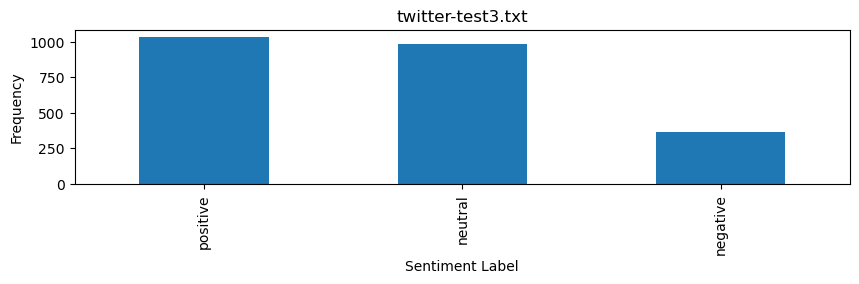

In [15]:
plot_sentiment_distribution("twitter-test3.txt")

## Applying preprocessing to Data

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\areeb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
nltk.download('omw')

[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\areeb\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [18]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\areeb\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
train_data['clean_tweet_text'] = train_data['tweet_text'].apply(preprocess_text)
dev_data['clean_tweet_text'] = dev_data['tweet_text'].apply(preprocess_text)
test_data1['clean_tweet_text'] = test_data1['tweet_text'].apply(preprocess_text)
test_data2['clean_tweet_text'] = test_data2['tweet_text'].apply(preprocess_text)
test_data3['clean_tweet_text'] = test_data3['tweet_text'].apply(preprocess_text)

In [20]:
train_data

,tweet_id,sentiment,tweet_text,clean_tweet_text
0,262696992176304465,neutral,@Oirisheye Hey you! I'm gonna be in Dublin in ...,hey im gon na dublin february know im saying
1,410734138242126311,positive,Literally so excited I'm going to a Sam Smith ...,literally excited im going sam smith concert o...
2,237615985571058688,neutral,@WINDmobile Will there be an option to buy the...,option buy gb ram model moto g rd gen instead ...
3,90473590077188360,neutral,Our Little Ms. Philippines. 👏👏👏#littleMsPhilip...,little m philippine littlemsphilippines united...
4,450236582392850660,negative,"@AngryRaiderFan I know. This, TPP, expanded wa...",know tpp expanded war drone strike mass survei...
...,...,...,...,...
1995,648550834532150634,positive,can it just be 5:30 tomorrow evening alREADY b...,tomorrow evening already antman post credit begin
1996,22324697041215693,neutral,Look for me on @GMA tomorrow at 7:34am talking...,look tomorrow talking exclusive hulk hogan apo...
1997,885111074317866321,neutral,@TheShannonBurke after @immandaschmidt's call ...,call foresee jackal lining studio visit thursday
1998,691260170402024265,neutral,Taking Go Set a Watchman with me to the beach ...,taking go set watchman beach tomorrow critic h...


In [21]:
# test_data1['clean_tweet_text']
# test_data2['clean_tweet_text']
# test_data3['clean_tweet_text']

## Train test Splits

In [22]:
# X_train, X_val, y_train, y_val = train_test_split(train_data['clean_tweet_text'], train_data['sentiment'], test_size=0.2, random_state=42)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['clean_tweet_text'])
X_dev = vectorizer.transform(dev_data['clean_tweet_text'])
X_test = vectorizer.transform(test_data1['clean_tweet_text'])

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(train_data['sentiment'])
y_dev = le.transform(dev_data['sentiment'])

## TRAINING FOR NAIVE BAYS

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
target_names = le.classes_.astype(str).tolist()
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [26]:
y_dev_pred = clf.predict(X_dev)
print(classification_report(y_dev, y_dev_pred, target_names=target_names))

              precision    recall  f1-score   support

    negative       1.00      0.34      0.50       378
     neutral       0.77      0.99      0.86       919
    positive       0.92      0.90      0.91       703

    accuracy                           0.83      2000
   macro avg       0.90      0.74      0.76      2000
weighted avg       0.87      0.83      0.81      2000



In [27]:
test_data1['sentiment_pred'] = clf.predict(vectorizer.transform(test_data1['clean_tweet_text']))
test_data2['sentiment_pred'] = clf.predict(vectorizer.transform(test_data2['clean_tweet_text']))
test_data3['sentiment_pred'] = clf.predict(vectorizer.transform(test_data3['clean_tweet_text']))

In [28]:
test_data1["sentiment"] = le.fit_transform(test_data1["sentiment"])
test_data2["sentiment"] = le.fit_transform(test_data2["sentiment"])
test_data3["sentiment"] = le.fit_transform(test_data3["sentiment"])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(test_data1["sentiment"], test_data1["sentiment_pred"], target_names=target_names))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       557
     neutral       0.48      0.77      0.60      1504
    positive       0.60      0.46      0.52      1470

    accuracy                           0.52      3531
   macro avg       0.36      0.41      0.37      3531
weighted avg       0.46      0.52      0.47      3531



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print(classification_report(test_data2["sentiment"], test_data2["sentiment_pred"], target_names=target_names))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       202
     neutral       0.44      0.76      0.56       669
    positive       0.69      0.49      0.57       982

    accuracy                           0.53      1853
   macro avg       0.38      0.42      0.38      1853
weighted avg       0.53      0.53      0.50      1853



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(classification_report(test_data3["sentiment"], test_data3["sentiment_pred"], target_names=target_names))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       363
     neutral       0.47      0.80      0.59       983
    positive       0.61      0.41      0.49      1033

    accuracy                           0.51      2379
   macro avg       0.36      0.40      0.36      2379
weighted avg       0.46      0.51      0.46      2379



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# initialize SVM model with linear kernel
svm_model = SVC(kernel='linear')

# train the model on training data
svm_model.fit(X_train, y_train)

# predict on development set
y_dev_pred = svm_model.predict(X_dev)

# print classification report
target_names = le.classes_.astype(str).tolist()
print(classification_report(y_dev, y_dev_pred, target_names=target_names))


              precision    recall  f1-score   support

    negative       1.00      0.84      0.91       378
     neutral       0.89      0.98      0.94       919
    positive       0.97      0.92      0.94       703

    accuracy                           0.94      2000
   macro avg       0.95      0.92      0.93      2000
weighted avg       0.94      0.94      0.93      2000



In [33]:
test_data1['sentiment_pred'] = svm_model.predict(vectorizer.transform(test_data1['clean_tweet_text']))
test_data2['sentiment_pred'] = svm_model.predict(vectorizer.transform(test_data2['clean_tweet_text']))
test_data3['sentiment_pred'] = svm_model.predict(vectorizer.transform(test_data3['clean_tweet_text']))

In [34]:
from sklearn.metrics import classification_report
print(classification_report(test_data1["sentiment"], test_data1["sentiment_pred"], target_names=target_names))

              precision    recall  f1-score   support

    negative       0.62      0.11      0.19       557
     neutral       0.51      0.71      0.59      1504
    positive       0.60      0.55      0.57      1470

    accuracy                           0.55      3531
   macro avg       0.58      0.45      0.45      3531
weighted avg       0.56      0.55      0.52      3531



In [35]:
print(classification_report(test_data2["sentiment"], test_data2["sentiment_pred"], target_names=target_names))

              precision    recall  f1-score   support

    negative       0.48      0.08      0.14       202
     neutral       0.46      0.69      0.55       669
    positive       0.68      0.56      0.62       982

    accuracy                           0.56      1853
   macro avg       0.54      0.44      0.43      1853
weighted avg       0.58      0.56      0.54      1853



In [36]:
print(classification_report(test_data3["sentiment"], test_data3["sentiment_pred"], target_names=target_names))

              precision    recall  f1-score   support

    negative       0.56      0.13      0.21       363
     neutral       0.50      0.73      0.59       983
    positive       0.62      0.50      0.55      1033

    accuracy                           0.54      2379
   macro avg       0.56      0.45      0.45      2379
weighted avg       0.56      0.54      0.52      2379



In [37]:
# !pip uninstall torchtext

In [38]:
# !pip install torchtext==0.10.0

In [39]:
import torch
from torchtext import data, datasets
import torchtext
from torchtext.vocab import Vocab
print(torchtext.__version__)


0.10.0


In [40]:
from torchtext.legacy import data


In [41]:
# !pip install spacy

In [42]:
# !python -m spacy download en_core_web_sm

In [43]:
TEXT = data.Field(tokenize='spacy')
LABEL = data.LabelField(dtype=torch.float)

# create the training, validation, and test datasets
train_data = data.TabularDataset(
    path='twitter-training-data.txt',
    format='tsv',
    fields=[('clean_tweet_text', TEXT), ('label', LABEL)]
)

dev_data = data.TabularDataset(
    path='twitter-dev-data.txt',
    format='tsv',
    fields=[('clean_tweet_text', TEXT), ('label', LABEL)]
)

test_data1 = data.TabularDataset(
    path='twitter-test1.txt',
    format='tsv',
    fields=[('clean_tweet_text', TEXT), ('label', None)]
)

test_data2 = data.TabularDataset(
    path='twitter-test2.txt',
    format='tsv',
    fields=[('clean_tweet_text', TEXT), ('label', None)]
)

test_data3 = data.TabularDataset(
    path='twitter-test3.txt',
    format='tsv',
    fields=[('clean_tweet_text', TEXT), ('label', None)]
)


C:\Users\areeb\AppData\Roaming\Python\Python39\site-packages\torchtext\data\utils.py:123: UserWarning: Spacy model "en" could not be loaded, trying "en_core_web_sm" instead
  warnings.warn(f'Spacy model "{language}" could not be loaded, trying "{OLD_MODEL_SHORTCUTS[language]}" instead')


In [44]:
%load_ext watermark
%watermark -a 'Sebastian-Raschka' -v -p torch

import torch
import torch.nn.functional as F
from torchtext import data
from torchtext import datasets
import time
import random

torch.backends.cudnn.deterministic = True

Author: Sebastian-Raschka

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 7.31.1

torch: 1.9.0



In [45]:
RANDOM_SEED = 123
torch.manual_seed(RANDOM_SEED)

VOCABULARY_SIZE = 20000
LEARNING_RATE = 1e-4
BATCH_SIZE = 128
NUM_EPOCHS = 15
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

EMBEDDING_DIM = 128
HIDDEN_DIM = 256
OUTPUT_DIM = 1

In [46]:
# !pip install torchtext
# from torchtext.data import Field, LabelField
from torchtext.legacy.data import Field, LabelField, BucketIterator
from torchtext import datasets
from torchtext.datasets import IMDB
from torchtext.legacy import data

In [47]:
train_data = train_data
valid_data = dev_data
test_data = test_data1

NameError: name 'text_field' is not defined

In [60]:
train_loader, valid_loader, test_loader = data.BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size=BATCH_SIZE,
    sort_within_batch=True,
    sort_key=lambda x: len(x.text),
    device=DEVICE)


In [61]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text, text_length):

        #[sentence len, batch size] => [sentence len, batch size, embedding size]
        embedded = self.embedding(text)
        
        packed = torch.nn.utils.rnn.pack_padded_sequence(embedded, text_length)
        
        #[sentence len, batch size, embedding size] => 
        #  output: [sentence len, batch size, hidden size]
        #  hidden: [1, batch size, hidden size]
        packed_output, (hidden, cell) = self.rnn(packed)
        
        return self.fc(hidden.squeeze(0)).view(-1)

In [62]:
# define the path to the GloVe embedding file
glove_path = 'glove.6B.100d.txt'

# load the pre-trained embeddings
vectors = torchtext.vocab.Vectors(name=glove_path)

# build the vocabulary using the training data and the pre-trained embeddings
TEXT.build_vocab(train_data, max_size=VOCABULARY_SIZE, vectors=vectors, unk_init=torch.Tensor.normal_)
LABEL.build_vocab(train_data)

# get the input dimension from the length of the vocabulary
INPUT_DIM = len(TEXT.vocab)

# create the model
torch.manual_seed(RANDOM_SEED)
model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)


In [63]:
def compute_binary_accuracy(model, data_loader, device):
    model.eval()
    correct_pred, num_examples = 0, 0
    with torch.no_grad():
        for batch_idx, batch_data in enumerate(data_loader):
            text, text_lengths = batch_data.text
            logits = model(text, text_lengths)
            predicted_labels = (torch.sigmoid(logits) > 0.5).long()
            num_examples += batch_data.label.size(0)
            correct_pred += (predicted_labels == batch_data.label.long()).sum()
        return correct_pred.float()/num_examples * 100

In [69]:
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    model.train()
    for batch_idx, batch_data in enumerate(train_loader):
        
        text = batch_data.TEXT
        text_lengths = batch_data.text_lengths
        label = batch_data.LABEL
        
        ### FORWARD AND BACK PROP
        logits = model(text, text_lengths)
        cost = F.binary_cross_entropy_with_logits(logits, label.float())
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} | '
                   f'Cost: {cost:.4f}')

    with torch.set_grad_enabled(False):
        print(f'training accuracy: '
              f'{compute_binary_accuracy(model, train_loader, DEVICE):.2f}%'
              f'\nvalid accuracy: '
              f'{compute_binary_accuracy(model, valid_loader, DEVICE):.2f}%')
        
    print(f'Time elapsed: {(time.time() - start_time)/60:.2f} min')
    
print(f'Total Training Time: {(time.time() - start_time)/60:.2f} min')
print(f'Test accuracy: {compute_binary_accuracy(model, test_loader, DEVICE):.2f}%')


AttributeError: 'Example' object has no attribute 'text'

In [ ]:
import spacy
nlp = spacy.load('en')

def predict_sentiment(model, sentence):
    # based on:
    # https://github.com/bentrevett/pytorch-sentiment-analysis/blob/
    # master/2%20-%20Upgraded%20Sentiment%20Analysis.ipynb
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(DEVICE)
    tensor = tensor.unsqueeze(1)
    length_tensor = torch.LongTensor(length)
    prediction = torch.sigmoid(model(tensor, length_tensor))
    return prediction.item()

In [ ]:
print('Probability positive:')
predict_sentiment(model, "I really love this movie. This movie is so great!")